In [ ]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [ ]:
np.random.seed(500)

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
  
Corpus = pd.read_csv("books_data.csv")
print(Corpus)

     Unnamed: 0 Author                                               Text
0             0      a  befell me in the person of Dr. Jekyll, I could...
1             1      a  was far from truly possessing, “you speak enig...
2             2      a  edition. Shocking murder of an M.P.” That was ...
3             3      a  creature was astute; mastered his fury with a ...
4             4      a  which stood within ran forth. At that time my ...
..          ...    ...                                                ...
995         995      e  Egrets which he was paid to protect. I like to...
996         996      e  hence is widely known as the Eaves Swallow. No...
997         997      e  every night. The island was small and perfectl...
998         998      e  in short, the change is chiefly a psychologica...
999         999      e  and about four feet across the top. At this da...

[1000 rows x 3 columns]


In [ ]:
Corpus=Corpus.drop(columns=['Unnamed: 0'])

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Remove blank rows if any.
Corpus['Text'].dropna(inplace=True)
#Change all the text to lower case.
Corpus['Text'] = [entry.lower() for entry in Corpus['Text']]
#Tokenization
Corpus['Text']= [word_tokenize(entry) for entry in Corpus['Text']]
#Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(Corpus['Text']):
  Final_words = []
  word_Lemmatized = WordNetLemmatizer()
  for word, tag in pos_tag(entry):
    if word not in stopwords.words('english') and word.isalpha():
      word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
      Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
  Corpus.loc[index,'text_final'] = str(Final_words)

In [ ]:
Corpus.head(1)

,Author,Text,text_final
0,a,"[befell, me, in, the, person, of, dr., jekyll,...","['befall', 'person', 'jekyll', 'could', 'enter..."


In [ ]:
from google.colab import data_table
data_table.DataTable(Corpus, include_index=False, num_rows_per_page=1)

,Author,Text,text_final
0,a,"[befell, me, in, the, person, of, dr., jekyll,...","['befall', 'person', 'jekyll', 'could', 'enter..."
1,a,"[was, far, from, truly, possessing, ,, “, you,...","['far', 'truly', 'possess', 'speak', 'enigmas'..."
2,a,"[edition, ., shocking, murder, of, an, m.p., ”...","['edition', 'shock', 'murder', 'funeral', 'ora..."
3,a,"[creature, was, astute, ;, mastered, his, fury...","['creature', 'astute', 'master', 'fury', 'grea..."
4,a,"[which, stood, within, ran, forth, ., at, that...","['stand', 'within', 'ran', 'forth', 'time', 'v..."
...,...,...,...
995,e,"[egrets, which, he, was, paid, to, protect, .,...","['egret', 'pay', 'protect', 'like', 'think', '..."
996,e,"[hence, is, widely, known, as, the, eaves, swa...","['hence', 'widely', 'know', 'eaves', 'swallow'..."
997,e,"[every, night, ., the, island, was, small, and...","['every', 'night', 'island', 'small', 'perfect..."
998,e,"[in, short, ,, the, change, is, chiefly, a, ps...","['short', 'change', 'chiefly', 'psychological'..."


In [ ]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['text_final'],Corpus['Author'],test_size=0.2)

In [ ]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [ ]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(Corpus['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [ ]:
print(Tfidf_vect.vocabulary_)

{'befall': 468, 'person': 3080, 'jekyll': 2466, 'could': 994, 'enter': 1440, 'edward': 1367, 'hyde': 2196, 'without': 4930, 'pecuniary': 3052, 'loss': 2653, 'thus': 4366, 'fortify': 1684, 'suppose': 4170, 'every': 1470, 'side': 3759, 'begin': 471, 'profit': 3235, 'strange': 4068, 'immunity': 2242, 'position': 3160, 'men': 2741, 'hire': 2097, 'bravo': 568, 'transact': 4448, 'crime': 1025, 'reputation': 3418, 'sit': 3794, 'shelter': 3705, 'first': 1622, 'ever': 1469, 'pleasure': 3129, 'plod': 3131, 'public': 3270, 'eye': 1530, 'load': 2631, 'genial': 1794, 'respectability': 3432, 'moment': 2797, 'like': 2610, 'schoolboy': 3581, 'strip': 4089, 'lending': 2589, 'spring': 3976, 'headlong': 2030, 'far': 1557, 'truly': 4493, 'possess': 3163, 'speak': 3935, 'enigmas': 1436, 'perhaps': 3070, 'wonder': 4939, 'hear': 2041, 'strong': 4092, 'impression': 2267, 'belief': 479, 'go': 1849, 'way': 4818, 'inexplicable': 2327, 'service': 3666, 'pause': 3047, 'see': 3623, 'well': 4844, 'reply': 3410, 'vis

In [ ]:
print(Train_X_Tfidf)

  (0, 4960)	0.15249971847990584
  (0, 4886)	0.13017631730774018
  (0, 4877)	0.12346038162010729
  (0, 4657)	0.160832133973965
  (0, 4169)	0.18959009438020324
  (0, 4045)	0.0960169065122774
  (0, 3623)	0.0754252342509234
  (0, 3557)	0.10729402876925206
  (0, 3395)	0.1318966100479757
  (0, 3390)	0.1318966100479757
  (0, 3319)	0.19630603006783612
  (0, 3279)	0.18959009438020324
  (0, 3202)	0.13668396891635592
  (0, 3070)	0.12151797031230957
  (0, 2998)	0.18959009438020324
  (0, 2997)	0.1794633132632346
  (0, 2903)	0.10973565855588596
  (0, 2760)	0.0965592081984814
  (0, 2727)	0.11797306261543153
  (0, 2650)	0.18959009438020324
  (0, 2648)	0.07979476693683096
  (0, 2433)	0.20496437706326678
  (0, 2397)	0.21716763175557544
  (0, 2156)	0.10576980792312285
  (0, 1857)	0.09247199881539934
  :	:
  (799, 2872)	0.09792845186163028
  (799, 2792)	0.15354092510028378
  (799, 2778)	0.22628578172587063
  (799, 2694)	0.1637183871774824
  (799, 2691)	0.06073912600565809
  (799, 2590)	0.14967163359592628

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
# fit the training dataset on the classifier
KNN = KNeighborsClassifier(n_neighbors = 7)
KNN.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_KNN = KNN.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("KNN Accuracy Score:",accuracy_score(predictions_KNN, Test_Y)*100)

KNN Accuracy Score: 87.5


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Test_Y,predictions_KNN))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        47
           1       0.85      0.70      0.77        40
           2       0.76      0.97      0.85        39
           3       0.89      0.82      0.85        39
           4       1.00      1.00      1.00        35

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.87       200



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,shuffle=True, random_state=123)
KNN = KNeighborsClassifier(n_neighbors = 3)
cv_scores = cross_val_score(KNN,Train_X_Tfidf,Train_Y,cv=kf)

In [ ]:
cv_scores

array([0.7625, 0.9   , 0.8125, 0.85  , 0.85  , 0.8875, 0.875 , 0.925 ,
       0.9   , 0.8375])

In [ ]:
cv_scores.mean()

0.86

Normalized confusion matrix
[[0.89361702 0.         0.10638298 0.         0.        ]
 [0.1        0.7        0.1        0.1        0.        ]
 [0.         0.02564103 0.97435897 0.         0.        ]
 [0.         0.1025641  0.07692308 0.82051282 0.        ]
 [0.         0.         0.         0.         1.        ]]


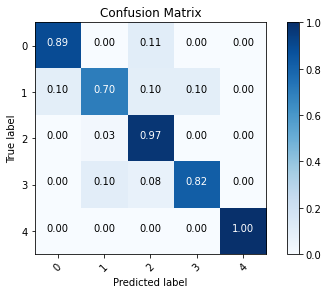

In [ ]:
# Importing necessary libraries
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt# Defining a module for Confusion Matrix...
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
    else:
      print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0])
                                  , range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(Test_Y,predictions_KNN)
plt.figure()
plot_confusion_matrix(cm, classes=[0,1,2,3,4], normalize=True,
                      title='Confusion Matrix')

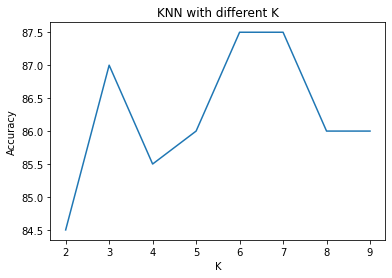

In [ ]:
x=[]
y=[]
for i in np.arange(2,10,1):
  x.append(i)
  KNN = KNeighborsClassifier(n_neighbors = i)
  KNN.fit(Train_X_Tfidf,Train_Y)
  # predict the labels on validation dataset
  predictions_KNN = KNN.predict(Test_X_Tfidf)
  # Use accuracy_score function to get the accuracy
  y.append(accuracy_score(predictions_KNN, Test_Y)*100)

import matplotlib.pyplot as plt
plt.plot(x, y)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("KNN with different K") 
plt.show()

In [36]:
y

[84.5, 87.0, 85.5, 86.0, 87.5, 87.5, 86.0, 86.0]